In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl


### From Sheet to DataFrame



We begin by defining a dictionary that contains the spreadsheet key.

In [2]:
nigeria_data = '17L5cDhXRLNAckP3JvBLTLSYIguFqP2ebMvQLH96c0n4'
nigeria_production = '1kG_fVBmj9EEF9LOwxN30HBxkQENOoWeQjVPYzMJe3b4-8DA'
nigeria_consumption = '1kG_fVBmj9EEF9LOwxN30HBxkQENOoWeQjVPYzMJe3b4'

With the spreadsheet defined, grab it and define a couple of
dataframes.



In [3]:
import pandas as pd
import numpy as np
import sys
from eep153_tools.sheets import read_sheets

expend = read_sheets(nigeria_data,sheet='Expenditures')
expend.columns.name = 'i'
                 
# Change 'ICRISAT' to key of your own sheet in Sheets, above
hh_char = read_sheets(nigeria_data,sheet="HH Characteristics")
hh_char.columns.name = 'k'

# Assume a single market: (Comment this out to make each village its own market)
hh_char['m'] = 1
expend['m'] = 1

# x may have duplicate columns
expend = expend.groupby('i',axis=1).sum()
expend = expend.apply(lambda x: pd.to_numeric(x,errors='coerce'))
expend = expend.replace(0,np.nan)

# Take logs of expenditures; call this y
log_expend = np.log(expend.set_index(['j','t','m']))
           
hh_char.set_index(['j','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


Sort the new Data Frame in order to group by year.

In [4]:
expend = expend.set_index(['t','j','m']).sort_index()
expend = expend.replace(0.0,np.nan) # Replace zeroes with np.nan
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10003  1                        NaN       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   
     379155 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10003  1   60.0                  90.0     100.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   
     379155 1    NaN                   NaN     300.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

# People per Household, Total Expenditures, and Expenditures per Capita

Use the household data to calculate the number of people per household.

In [5]:
people = hh_char.sum(axis=1)
num_people = pd.DataFrame(people)
num_people = num_people.rename(columns={0:'People per HH'})
num_people = num_people.reset_index().set_index(['t','j','m']).sort_index()
num_people

People per HH
t    j      m               
2010 10001  1              7
     10002  1              7
     10003  1              6
     10004  1              3
     10006  1              3
...                      ...
2018 379146 1              4
     379148 1              1
     379151 1              5
     379154 1              2
     379155 1              4

[19249 rows x 1 columns]

Aggregate the expenditure data to find the total expenditures for each household.

In [6]:
total_expend = expend.iloc[:, 0:124].sum(axis=1)
total = pd.DataFrame(total_expend)
total = total.rename(columns={0:'Total Expenditures'})
total

Total Expenditures
t    j      m                    
2010 10001  1             20225.0
     10002  1             15365.0
     10003  1              4675.0
     10004  1              4465.0
     10006  1              7565.0
...                           ...
2018 379146 1             31100.0
     379148 1              6410.0
     379151 1             20540.0
     379154 1             22650.0
     379155 1              7550.0

[19141 rows x 1 columns]

Add the total expenditures and people per household information to the dataframe. Then, use these columns to add an expenditures per capita column as well.

In [7]:
expend['Total Expenditures'] = total['Total Expenditures']
expend['People per HH'] = num_people['People per HH']
expend['Expenditures per capita'] = expend['Total Expenditures'] / expend['People per HH']
expend

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10003  1                      NaN              180.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10003  1           NaN               NaN    100.0   500.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
...                     ...               ...      ...     ...   
2018 379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Tomatoes  Watermelon  \
t    j      m                                       ...                         
2010 10001  1                      540.0       NaN  ...     150.0         NaN   
     10002  1                     2000.0       NaN  ...     120.0         NaN   
     10003  1                        NaN       NaN  ...     100.0         NaN   
     10004  1                        NaN       NaN  ...     100.0         NaN   
     10006  1                        NaN       NaN  ...     400.0         NaN   
...                                  ...       ...  ...       ...         ...   
2018 379146 1                        NaN       NaN  ...       NaN       500.0   
     379148 1                        NaN       NaN  ...     200.0       150.0   
     379151 1                        NaN       NaN  ...     600.0       600.0   
     379154 1                        NaN       NaN  ...     100.0       200.0   
     379155 1                        NaN       NaN  ...     300.0       200.0   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  \
t    j      m                                                                   
2010 10001  1          NaN        600.0             NaN        NaN     1500.0   
     10002  1          NaN        400.0             NaN        NaN     1200.0   
     10003  1          NaN        100.0             NaN        NaN      400.0   
     10004  1          NaN        100.0             NaN        NaN      400.0   
     10006  1          NaN          NaN             NaN        NaN      400.0   
...                    ...          ...             ...        ...        ...   
2018 379146 1          NaN          NaN             NaN        NaN     1800.0   
     379148 1          NaN          NaN             NaN        NaN     1600.0   
     379151 1        750.0       1600.0             NaN        NaN     3500.0   
     379154 1          NaN          NaN             NaN        NaN      650.0   
     379155 1          NaN          NaN             NaN      

In [8]:
expend.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19141 entries, (2010, 10001, 1) to (2018, 379155, 1)
Columns: 127 entries, (Cocoyam, Spinach, etc) to Expenditures per capita
dtypes: float64(126), int64(1)
memory usage: 18.9 MB


# Putting into Quartiles

In [9]:
def one_year(df, year):
    new_df = df.loc[[year]]
    return new_df

def quartiles_by_te(df, year, quartile):
    # Selecting out one year, sorting by total expenditures, then filtering out the households that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Total Expenditures', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Total Expenditures'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]
    
def quartiles_by_epc(df, year, quartile):
    # Selecting out one year, sorting by expenditures per capita, then filtering out the households that spent nothing
    one_year_df = one_year(df, year)
    one_year_df = one_year_df.reset_index().sort_values('Expenditures per capita', axis=0).replace(0,np.nan)
    one_year_df = one_year_df.dropna(axis=0, how='any', subset=['Expenditures per capita'])
    
    # Number of rows for each quartile
    total_rows = len(one_year_df)
    rows_per_qtr = round(total_rows / 4)
    
    # Selecting the necessary rows for each quartile
    if quartile == 1:
        return one_year_df.iloc[0:rows_per_qtr-1]
    else:
        first_row = (quartile-1) * rows_per_qtr
        last_row = (quartile * rows_per_qtr) - 1
        return one_year_df.iloc[first_row:last_row]

In [10]:
one_year(expend, 2018)

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2018 10001  1                      NaN              300.0         NaN     NaN   
     10002  1                      NaN                NaN         NaN     NaN   
     10003  1                      NaN              300.0         NaN   400.0   
     10004  1                      NaN              300.0         NaN     NaN   
     10005  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
     379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   
     379155 1                    100.0              950.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2018 10001  1           NaN               NaN    300.0  1200.0   
     10002  1           NaN               NaN      NaN  1200.0   
     10003  1           NaN               NaN    300.0  2200.0   
     10004  1           NaN               NaN    100.0  1000.0   
     10005  1           NaN               NaN      NaN  1000.0   
...                     ...               ...      ...     ...   
     379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   
     379155 1           NaN               NaN      NaN  1400.0   

i              Beer (local and imported)  Biscuits  ...  Tomatoes  Watermelon  \
t    j      m                                       ...                         
2018 10001  1                        NaN     150.0  ...     400.0       300.0   
     10002  1                        NaN     150.0  ...     400.0       500.0   
     10003  1                        NaN       NaN  ...     400.0       300.0   
     10004  1                        NaN     100.0  ...     200.0         NaN   
     10005  1                        NaN       NaN  ...     100.0         NaN   
...                                  ...       ...  ...       ...         ...   
     379146 1                        NaN       NaN  ...       NaN       500.0   
     379148 1                        NaN       NaN  ...     200.0       150.0   
     379151 1                        NaN       NaN  ...     600.0       600.0   
     379154 1                        NaN       NaN  ...     100.0       200.0   
     379155 1                        NaN       NaN  ...     300.0       200.0   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  \
t    j      m                                                                   
2018 10001  1          NaN       1000.0             NaN        NaN      700.0   
     10002  1          NaN          NaN             NaN        NaN        NaN   
     10003  1        900.0       1000.0             NaN        NaN     1750.0   
     10004  1          NaN          NaN             NaN        NaN      600.0   
     10005  1          NaN          NaN             NaN        NaN        NaN   
...                    ...          ...             ...        ...        ...   
     379146 1          NaN          NaN             NaN        NaN     1800.0   
     379148 1          NaN          NaN             NaN        NaN     1600.0   
     379151 1        750.0       1600.0             NaN        NaN     3500.0   
     379154 1          NaN          NaN             NaN        NaN      650.0   
     379155 1          NaN          NaN             NaN      

Using the above functions, we were able to find the upper (fourth) and lower (first) quartiles in 2010 by total expenditures.

In [11]:
Q1_2010_TE = quartiles_by_te(expend, 2010, 1)
Q1_2010_TE
#TE is total expenditure

i,t,j,m,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,...,Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots,Total Expenditures,People per HH,Expenditures per capita
2659,2010,200065,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,6,11.666667
899,2010,70086,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1,100.000000
4633,2010,350063,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,4,25.000000
3394,2010,260068,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,4,25.000000
2944,2010,220071,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2010,140071,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,600.0,1970.0,1,1970.000000
1631,2010,120055,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,180.0,NaN,NaN,NaN,1970.0,4,492.500000
602,2010,50023,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,1970.0,5,394.000000
4145,2010,310043,1,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,12,165.000000


In [12]:
Q4_2010 = quartiles_by_te(expend, 2010, 4)
Q4_2010
#TE is total expenditure

i,t,j,m,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,...,Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots,Total Expenditures,People per HH,Expenditures per capita
2408,2010,190012,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,300.0,NaN,NaN,NaN,5405.0,10,540.500000
2410,2010,190015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,NaN,NaN,250.0,NaN,NaN,NaN,5410.0,2,2705.000000
2025,2010,160062,1,NaN,NaN,NaN,NaN,NaN,NaN,200.0,...,50.0,NaN,NaN,300.0,NaN,NaN,500.0,5410.0,3,1803.333333
4753,2010,360056,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,NaN,NaN,200.0,NaN,NaN,NaN,5410.0,11,491.818182
4024,2010,300148,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,5410.0,8,676.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,2010,190007,1,80.0,NaN,NaN,NaN,NaN,1100.0,NaN,...,250.0,NaN,NaN,1500.0,NaN,NaN,NaN,35120.0,11,3192.727273
2299,2010,180019,1,NaN,100.0,NaN,NaN,NaN,NaN,NaN,...,500.0,NaN,NaN,560.0,NaN,NaN,2000.0,35190.0,6,5865.000000
3282,2010,250025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,37530.0,10,3753.000000
3277,2010,250020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,1200.0,NaN,NaN,32000.0,44630.0,6,7438.333333


Expenditures per capita (EPC) is more representative of the household spending as it takes into account the amount of people in the home. Therefore, we will be using EPC for our analysis. Below we have found the upper and lower quartiles for all of the years.

In [13]:
Q1_10 = quartiles_by_epc(expend, 2010, 1)
Q1_12 = quartiles_by_epc(expend, 2012, 1)
Q1_15 = quartiles_by_epc(expend, 2015, 1)
Q1_18 = quartiles_by_epc(expend, 2018, 1)
Q1 = pd.concat([Q1_10, Q1_12, Q1_15, Q1_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q1 = Q1.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q1
#epc is expenditure per capita

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas   Beef  \
t    j      m                                                   
2010 10013  1           NaN               NaN    100.0  400.0   
     10022  1           NaN               NaN    150.0    NaN   
     10063  1           NaN               NaN      NaN    NaN   
     10066  1           NaN               NaN      NaN  300.0   
     10069  1           NaN               NaN      NaN    NaN   
...                     ...               ...      ...    ...   
2018 379090 1           NaN               NaN      NaN  500.0   
     379092 1           NaN               NaN      NaN    NaN   
     379094 1           NaN               NaN      NaN    NaN   
     379096 1           NaN               NaN      NaN    NaN   
     379127 1           NaN               NaN    150.0    NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10013  1                        NaN       NaN  ...             NaN  30.0   
     10022  1                        NaN       NaN  ...             NaN   NaN   
     10063  1                        NaN       NaN  ...             NaN   NaN   
     10066  1                        NaN       NaN  ...             NaN   NaN   
     10069  1                        NaN       NaN  ...             NaN   NaN   
...                                  ...       ...  ...             ...   ...   
2018 379090 1                        NaN       NaN  ...             NaN   NaN   
     379092 1                        NaN       NaN  ...             NaN  50.0   
     379094 1                        NaN     120.0  ...             NaN   NaN   
     379096 1                        NaN       NaN  ...             NaN   NaN   
     379127 1                        NaN       NaN  ...             NaN   NaN   

i              Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10013  1                  60.0     100.0         NaN          NaN   
     10022  1                  30.0      50.0         NaN          NaN   
     10063  1                  35.0     100.0         NaN          NaN   
     10066  1                  35.0     100.0         NaN          NaN   
     10069  1                   NaN     100.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379090 1                   NaN     200.0         NaN          NaN   
     379092 1                   NaN       NaN         NaN          NaN   
     379094 1                   NaN     250.0         NaN          NaN   
     379096 1                   NaN     300.0         NaN          NaN   
     379127 1                 350.0       NaN       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m   

In [14]:
Q4_10 = quartiles_by_epc(expend, 2010, 4)
Q4_12 = quartiles_by_epc(expend, 2012, 4)
Q4_15 = quartiles_by_epc(expend, 2015, 4)
Q4_18 = quartiles_by_epc(expend, 2018, 4)
Q4 = pd.concat([Q4_10, Q4_12, Q4_15, Q4_18]).reset_index().drop(columns=['index']).set_index(['t', 'j', 'm']).sort_values(['t','j'])
Q4 = Q4.drop(columns=['Total Expenditures', 'People per HH', 'Expenditures per capita']) 
Q4

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      NaN              280.0         NaN     NaN   
     10002  1                      NaN              280.0         NaN     NaN   
     10004  1                      NaN              180.0         NaN     NaN   
     10006  1                      NaN                NaN         NaN     NaN   
     10009  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379144 1                      NaN                NaN         NaN   900.0   
     379146 1                      NaN             1100.0         NaN     NaN   
     379148 1                    100.0                NaN         NaN     NaN   
     379151 1                      NaN              900.0         NaN     NaN   
     379154 1                    200.0             1200.0         NaN     NaN   

i              Avocado pear  Baby milk powder  Bananas    Beef  \
t    j      m                                                    
2010 10001  1           NaN               NaN    200.0   500.0   
     10002  1           NaN               NaN    180.0  1200.0   
     10004  1           NaN               NaN    100.0   500.0   
     10006  1           NaN               NaN    300.0   300.0   
     10009  1           NaN             600.0    100.0   300.0   
...                     ...               ...      ...     ...   
2018 379144 1           NaN               NaN    600.0     NaN   
     379146 1           NaN               NaN      NaN     NaN   
     379148 1           NaN               NaN      NaN   700.0   
     379151 1           NaN               NaN    500.0     NaN   
     379154 1           NaN               NaN      NaN  1300.0   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                      540.0       NaN  ...           150.0   
     10002  1                     2000.0       NaN  ...           200.0   
     10004  1                        NaN       NaN  ...             NaN   
     10006  1                        NaN       NaN  ...             NaN   
     10009  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379144 1                        NaN    2200.0  ...             NaN   
     379146 1                        NaN       NaN  ...             NaN   
     379148 1                        NaN       NaN  ...             NaN   
     379151 1                        NaN       NaN  ...             NaN   
     379154 1                        NaN       NaN  ...             NaN   

i                Tea  Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                                   
2010 10001  1    NaN                 150.0     150.0         NaN          NaN   
     10002  1  140.0                 240.0     120.0         NaN          NaN   
     10004  1   30.0                  60.0     100.0         NaN          NaN   
     10006  1  650.0                   NaN     400.0         NaN          NaN   
     10009  1   60.0                 120.0     200.0         NaN          NaN   
...              ...                   ...       ...         ...          ...   
2018 379144 1    NaN                   NaN     400.0       100.0          NaN   
     379146 1    NaN                   NaN       NaN       500.0          NaN   
     379148 1    NaN                  60.0     200.0       150.0          NaN   
     379151 1    NaN                 150.0     600.0       600.0        750.0   
     379154 1    NaN                   NaN     100.0       200.0          NaN   

i              White beans  Wild game meat  Yam flour  Ya

## Filter Household Dataframe to create one only including 1st quartile households and another including just 4th quartile households.

In [15]:
#First Quartile
hh_char = hh_char.reorder_levels(['t','j','m'])
Q1Index = Q1.index.tolist()
Q4Index = Q4.index.tolist()
hh_charQ1 = hh_char[hh_char.index.isin(Q1Index)]
hh_charQ4 = hh_char[hh_char.index.isin(Q4Index)]
hh_charQ1

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10013  1      0      0       0        0        0        2      0      1   
     10022  1      0      1       1        1        0        1      0      0   
     10063  1      0      0       0        0        3        0      1      0   
     10066  1      0      0       0        1        0        0      1      0   
     10069  1      0      0       0        0        1        0      0      0   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379090 1      1      0       2        0        0        1      0      0   
     379092 1      0      0       1        0        1        0      0      2   
     379094 1      1      0       0        0        0        1      0      0   
     379096 1      0      1       1        1        0        1      0      0   
     379127 1      1      0       0        0        0        1      0      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10013  1      0       0        1        2        1      1  
     10022  1      0       1        0        0        1      0  
     10063  1      0       0        0        0        0      1  
     10066  1      0       0        2        1        1      0  
     10069  1      0       1        1        3        0      1  
...              ...     ...      ...      ...      ...    ...  
2018 379090 1      1       0        2        0        1      1  
     379092 1      2       0        0        2        0      0  
     379094 1      1       1        0        1        0      0  
     379096 1      1       0        1        1        1      0  
     379127 1      0       1        0        1        0      0  

[4752 rows x 14 columns]

In [16]:
#Fourth Quartile
hh_charQ4

k              M 0-3  M 4-8  M 9-13  M 14-18  M 19-30  M 31-50  M 51+  F 0-3  \
t    j      m                                                                  
2010 10001  1      0      0       0        0        1        2      0      1   
     10002  1      0      0       1        1        1        1      0      0   
     10004  1      0      0       1        0        0        0      1      0   
     10006  1      0      0       0        0        1        1      0      0   
     10009  1      0      0       0        0        0        1      0      1   
...              ...    ...     ...      ...      ...      ...    ...    ...   
2018 379144 1      0      0       0        0        0        1      0      0   
     379146 1      0      0       0        0        1        1      1      0   
     379148 1      0      0       0        0        1        0      0      0   
     379151 1      0      0       2        0        0        0      1      0   
     379154 1      0      0       0        0        0        0      1      0   

k              F 4-8  F 9-13  F 14-18  F 19-30  F 31-50  F 51+  
t    j      m                                                   
2010 10001  1      0       0        0        1        2      0  
     10002  1      0       0        0        2        1      0  
     10004  1      0       0        0        0        0      1  
     10006  1      0       0        0        1        0      0  
     10009  1      0       0        1        1        0      0  
...              ...     ...      ...      ...      ...    ...  
2018 379144 1      1       0        0        1        0      0  
     379146 1      0       0        0        0        0      1  
     379148 1      0       0        0        0        0      0  
     379151 1      0       0        1        0        1      0  
     379154 1      0       0        0        1        0      0  

[4752 rows x 14 columns]

In [17]:
#Log of Food Expenditure Dataframe (after running np.log on values)

Q1 = Q1.replace(0,np.nan) 
Q4 = Q4.replace(0,np.nan) 

log_Q1 = np.log(Q1)
log_Q4 = np.log(Q4)

In [18]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [19]:
#Log Household Size and add to household dataframe for Q1 and Q4

# set index to j, t, m so that df.sum() ignore index values
hh_charQ1 = hh_charQ1.reset_index()
hh_charQ1.set_index(['j','t','m'], inplace=True)
hh_charQ4 = hh_charQ4.reset_index()
hh_charQ4.set_index(['j','t','m'], inplace=True)

# create new column of household size
hh_charQ1['Hsize'] = hh_charQ1.sum(axis=1).values
hh_charQ4['Hsize'] = hh_charQ4.sum(axis=1).values

# remove erroneous data with household_size = 0
hh_charQ1 = hh_charQ1[hh_charQ1['Hsize'] > 0]
hh_charQ4 = hh_charQ4[hh_charQ4['Hsize'] > 0]

# create new column 'log Hsize'
hh_charQ1['log Hsize'] = np.log(hh_charQ1['Hsize'])
hh_charQ4['log Hsize'] = np.log(hh_charQ4['Hsize'])

# remove Hsize column
hh_charQ1 = hh_charQ1.drop(columns=['Hsize']) 
hh_charQ4 = hh_charQ4.drop(columns=['Hsize']) 

In [20]:
#test
hh_charQ1

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,log Hsize
j,t,m,,,,,,,,,,,,,,,
10013,2010,1,0,0,0,0,0,2,0,1,0,0,1,2,1,1,2.079442
10022,2010,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1.791759
10063,2010,1,0,0,0,0,3,0,1,0,0,0,0,0,0,1,1.609438
10066,2010,1,0,0,0,1,0,0,1,0,0,0,2,1,1,0,1.791759
10069,2010,1,0,0,0,0,1,0,0,0,0,1,1,3,0,1,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379090,2018,1,1,0,2,0,0,1,0,0,1,0,2,0,1,1,2.197225
379092,2018,1,0,0,1,0,1,0,0,2,2,0,0,2,0,0,2.079442
379094,2018,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1.609438


## Estimation



Below, we estimate the demand system for the upper and lower quartile households in Nigeria.

In [21]:
log_Q1

i              (Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      NaN                NaN         NaN     NaN   
     10022  1                      NaN                NaN         NaN     NaN   
     10063  1                      NaN                NaN         NaN     NaN   
     10066  1                      NaN                NaN         NaN     NaN   
     10069  1                      NaN                NaN         NaN     NaN   
...                                ...                ...         ...     ...   
2018 379090 1                      NaN                NaN         NaN     NaN   
     379092 1                      NaN                NaN         NaN     NaN   
     379094 1                      NaN                NaN         NaN     NaN   
     379096 1                      NaN                NaN         NaN     NaN   
     379127 1                      NaN                NaN         NaN     NaN   

i              Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           NaN               NaN  4.605170  5.991465   
     10022  1           NaN               NaN  5.010635       NaN   
     10063  1           NaN               NaN       NaN       NaN   
     10066  1           NaN               NaN       NaN  5.703782   
     10069  1           NaN               NaN       NaN       NaN   
...                     ...               ...       ...       ...   
2018 379090 1           NaN               NaN       NaN  6.214608   
     379092 1           NaN               NaN       NaN       NaN   
     379094 1           NaN               NaN       NaN       NaN   
     379096 1           NaN               NaN       NaN       NaN   
     379127 1           NaN               NaN  5.010635       NaN   

i              Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        NaN       NaN  ...             NaN   
     10022  1                        NaN       NaN  ...             NaN   
     10063  1                        NaN       NaN  ...             NaN   
     10066  1                        NaN       NaN  ...             NaN   
     10069  1                        NaN       NaN  ...             NaN   
...                                  ...       ...  ...             ...   
2018 379090 1                        NaN       NaN  ...             NaN   
     379092 1                        NaN       NaN  ...             NaN   
     379094 1                        NaN  4.787492  ...             NaN   
     379096 1                        NaN       NaN  ...             NaN   
     379127 1                        NaN       NaN  ...             NaN   

i                   Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  3.401197              4.094345  4.605170         NaN   
     10022  1       NaN              3.401197  3.912023         NaN   
     10063  1       NaN              3.555348  4.605170         NaN   
     10066  1       NaN              3.555348  4.605170         NaN   
     10069  1       NaN                   NaN  4.605170         NaN   
...                 ...                   ...       ...         ...   
2018 379090 1       NaN                   NaN  5.298317         NaN   
     379092 1  3.912023                   NaN       NaN         NaN   
     379094 1       NaN                   NaN  5.521461         NaN   
     379096 1       NaN                   NaN  5.703782         NaN   
     379127 1       NaN              5.857933       NaN    5.298317   

i              Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                       

In [22]:
log_Q1 = log_Q1.reorder_levels(['j','t','m'])
log_Q4 = log_Q4.reorder_levels(['j','t','m'])

In [23]:
import cfe

result1 = cfe.Result(y=log_Q1,z=hh_charQ1)
result4 = cfe.Result(y=log_Q4,z=hh_charQ4)

Missing dependencies for OracleDemands.


This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [24]:
result1

<xarray.Result>
Dimensions:           (k: 15, j: 3197, t: 4, m: 1, i: 9)
Coordinates:
  * j                 (j) int64 10005 10009 10013 10022 ... 379094 379096 379127
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) <U36 'Bread' ... 'White beans'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [25]:
result4

<xarray.Result>
Dimensions:           (k: 15, j: 3186, t: 4, m: 1, i: 39)
Coordinates:
  * j                 (j) int64 10001 10002 10003 10004 ... 379148 379151 379154
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) <U36 '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 1.0 1.0 1.0 ... nan nan 0.6931
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan 6.477
    logp              object None
    z                 (k, j, t, m) float64 0.0 1.0 1.0 1.0 ... nan nan 0.6931
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [26]:
result1.get_reduced_form()
result4.get_reduced_form()

In [27]:
result1.get_predicted_expenditures().sum(['m','i']).mean('j')
#

<xarray.DataArray (t: 4)>
array([21.72649895, 11.63452879, 36.59153191, 56.15069086])
Coordinates:
  * t        (t) int64 2010 2012 2015 2018

After running this we can examine the estimated coefficients $\delta$:



In [28]:
result1.delta.to_dataframe().unstack('k')
result4.delta.to_dataframe().unstack('k')

delta                                \
k                                        M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                              
(Cocoyam, Spinach, etc)               0.059970 -0.026824 -0.128255 -0.060140   
Agricultural eggs                     0.086844  0.059903  0.027056  0.020432   
Bananas                               0.112941  0.019600  0.028835  0.030731   
Beef                                  0.041234  0.017796  0.033165  0.038998   
Bread                                -0.026338  0.063221  0.001727  0.057792   
Brown beans                           0.014834  0.091460  0.068840  0.029102   
Chicken                              -0.061032  0.033191 -0.050040 -0.038478   
Chocolate drinks                     -0.035630  0.055367  0.068203  0.017425   
Condiments,(salt,spices,pepper, etc)  0.148230  0.006426  0.044869 -0.000825   
Fish-Dried                            0.155122  0.026463  0.001232  0.097397   
Fish-Fresh                           -0.080494  0.004656  0.041046 -0.004362   
Fish-Frozen                           0.058999  0.005119  0.006594  0.050949   
Fish-Smoked                          -0.041197  0.043157 -0.019277  0.053862   
Garden eggs/egg plant                 0.000739  0.037447 -0.130051  0.129735   
Gari -Yellow                         -0.049401 -0.014213  0.034010  0.051743   
Gari-White                           -0.027567 -0.005664  0.127520  0.021062   
Goat                                  0.074985 -0.016815 -0.062995  0.118926   
Groundnut oil                         0.065055  0.054413  0.067312  0.091114   
Malt drinks                           0.068250  0.042481  0.056144  0.057165   
Milk powder                           0.009672 -0.018615  0.002166  0.021498   
Milk tinned (unsweetened)             0.081237  0.063547 -0.009673  0.066668   
Okra-fresh                            0.000071  0.074140  0.041411  0.014963   
Onions                                0.028344  0.014653 -0.004037  0.051690   
Orange/tangerine                      0.062839  0.021212  0.037592  0.041828   
Other vegetables (fresh or canned)   -0.024739  0.126333  0.053614 -0.010630   
Palm oil                             -0.008042  0.083789  0.004990  0.085870   
Pineapples                            0.034971  0.010693  0.042640 -0.050638   
Plantains                             0.070069  0.154872  0.108133  0.100389   
Rice-Imported                         0.031562  0.190569  0.048920  0.138436   
Rice-local                            0.235522  0.142063  0.106548  0.130315   
Sachet water                         -0.050036  0.011843 -0.071714  0.016340   
Soft drinks (Coca cola, spirit etc)   0.019878  0.055400  0.020369  0.071855   
Sugar                                 0.069818  0.215184  0.077732  0.107936   
Sweet Potatoes                        0.022577  0.039896  0.034979  0.175059   
Tea                                   0.128394 -0.182782 -0.054116 -0.003283   
Tomato puree(canned)                  0.029677 -0.028415 -0.069827 -0.022324   
Tomatoes                             -0.011822  0.041274  0.022443  0.019055   
White beans                           0.101548  0.085012  0.024664  0.099476   
Yam-roots                             0.013173  0.034806  0.067913  0.059875   

                                                                              \
k                                      M 19-30   M 31-50     M 51+     F 0-3   
i                                                                              
(Cocoyam, Spinach, etc)              -0.066222 -0.203679 -0.003154 -0.110133   
Agricultural eggs                     0.009668  0.162421  0.187265 -0.030647   
Bananas                               0.057242  0.092288  0.082695 -0.005638   
Beef                                  0.083915  0.071213  0.120941  0.023505   
Bread                                 0.043891  0.078987  0.101278  0.003712   
Brown beans                           0.

Also the good-time constants $a_{it}$ (this captures the effects of prices)



In [29]:
result1.a.to_dataframe().unstack('i')

a                                                               \
i          Bread Condiments,(salt,spices,pepper, etc) Groundnut oil    Onions   
t    m                                                                          
2010 1  4.132231                             3.761195      4.355794  3.539646   
2012 1  4.028556                             3.931693      3.893221  3.369722   
2015 1  4.234435                             4.438573      4.592232  3.224604   
2018 1  4.443681                             4.508119      4.499117  3.743854   

                                                             
i       Palm oil Rice-local     Sugar  Tomatoes White beans  
t    m                                                       
2010 1  5.324580   2.455150  2.376955  2.690814    4.727037  
2012 1  5.162490   2.555986  1.724645  2.469391    5.317079  
2015 1  5.175408   2.948691  2.232912  2.480203    5.461796  
2018 1  5.471405   2.971027  2.077796  2.694839    5.639164

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [30]:
result1.get_beta(as_df=True)

i
Bread                                   0.249771
Condiments,(salt,spices,pepper, etc)    0.150775
Groundnut oil                           0.105369
Onions                                  0.401157
Palm oil                                0.160994
Rice-local                              0.018439
Sugar                                   1.200716
Tomatoes                                0.271085
White beans                             0.103897
Name: beta, dtype: float64

In [31]:
result4.get_beta(as_df=True)

i
(Cocoyam, Spinach, etc)                 0.214391
Agricultural eggs                       0.500903
Bananas                                 0.310199
Beef                                    0.261743
Bread                                   0.262224
Brown beans                             0.231783
Chicken                                 0.212681
Chocolate drinks                        0.503696
Condiments,(salt,spices,pepper, etc)    0.419001
Fish-Dried                              0.378614
Fish-Fresh                              0.330833
Fish-Frozen                             0.200550
Fish-Smoked                             0.295947
Garden eggs/egg plant                   0.288953
Gari -Yellow                            0.247140
Gari-White                              0.274865
Goat                                    0.208295
Groundnut oil                           0.325517
Malt drinks                             0.328769
Milk powder                             0.607743
Milk tinned (unswe

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



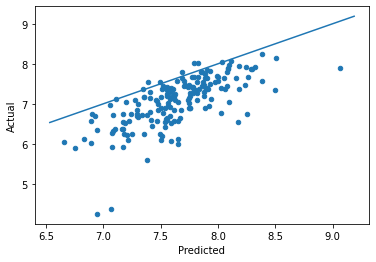

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result1.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result1.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

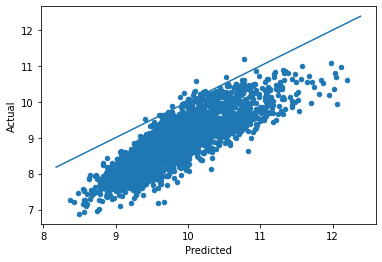

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result4.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result4.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [34]:
result1.to_dataset('icrisat.ds')

<xarray.Dataset>
Dimensions:           (j: 3197, i: 9, k: 15, t: 4, m: 1, kp: 15)
Coordinates:
  * j                 (j) int64 10005 10009 10013 10022 ... 379094 379096 379127
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * i                 (i) object 'Bread' ... 'White beans'
  * k                 (k) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
  * kp                (kp) <U9 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 51+' 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.2498 0.1508 0.1054 ... 1.201 0.2711 0.1039
    delta             (k, i) float64 -0.003088 0.2643 0.1028 ... 1.308 -0.433
    prices            object None
    characteristics   (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.08262 0.1346 ... 0.07711 0.08249
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 nan nan nan 0.0 ... nan nan nan 1.386

# Nutritional Data

Read in the consumption data for Nigerian households.

In [35]:
fdc_table = '1ed8FASRCkN9KwTWTvMzKT6UT4jWbSSZQEwZEmXCt8IQ'

fdc_codes = read_sheets(fdc_table,sheet="Sheet1")

consumption = read_sheets(nigeria_consumption,sheet='Consumption')
consumption.insert(loc=2, column='m', value=1)
consumption = consumption.set_index(['t', 'j', 'm'])
consumption = consumption.drop(columns=['Canned'])
consumption

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


u  (Cocoyam, Spinach, etc)  Agricultural eggs  \
t    j      m                                                                  
2010 10001  1          Kilograms                      NaN               0.89   
            1             Litres                      NaN                NaN   
     10002  1          Kilograms                      NaN               0.89   
            1             Litres                      NaN                NaN   
     10003  1          Kilograms                      NaN               0.44   
...                          ...                      ...                ...   
2018 379148 1      2. GRAMS (GR)                      NaN                NaN   
     379151 1  1. KILOGRAMS (KG)                      NaN                NaN   
            1      3. LITRES (L)                      NaN                NaN   
     379154 1  1. KILOGRAMS (KG)                      NaN                NaN   
     379155 1  1. KILOGRAMS (KG)                      NaN                NaN   

               Animal fat  Apples  Avocado pear  Baby milk powder  Bananas  \
t    j      m                                                                
2010 10001  1         NaN     NaN           NaN               NaN     1.30   
            1         NaN     NaN           NaN               NaN      NaN   
     10002  1         NaN     NaN           NaN               NaN     1.30   
            1         NaN     NaN           NaN               NaN      NaN   
     10003  1         NaN     NaN           NaN               NaN     0.35   
...                   ...     ...           ...               ...      ...   
2018 379148 1         NaN     NaN           NaN               NaN      NaN   
     379151 1         NaN     NaN           NaN               NaN      NaN   
            1         NaN     NaN           NaN               NaN      NaN   
     379154 1         NaN     NaN           NaN               NaN      NaN   
     379155 1         NaN     NaN           NaN               NaN      NaN   

                Beef  Beer (local and imported)  ...  Sweet Potatoes   Tea  \
t    j      m                                    ...                         
2010 10001  1    1.0                        NaN  ...             1.5   NaN   
            1    NaN                       2.25  ...             NaN   NaN   
     10002  1    2.0                        NaN  ...             1.8  0.12   
            1    NaN                       9.00  ...             NaN   NaN   
     10003  1    0.3                        NaN  ...             1.4  0.30   
...              ...                        ...  ...             ...   ...   
2018 379148 1  500.0                        NaN  ...             NaN   NaN   
     379151 1    NaN                        NaN  ...             NaN   NaN   
            1    NaN                        NaN  ...             NaN   NaN   
     379154 1    1.0                        NaN  ...             NaN   NaN   
     379155 1    1.0                        NaN  ...             NaN   NaN   

               Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10001  1                  0.42       1.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10002  1                  0.56       1.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10003  1                  0.21       1.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379148 1                   NaN       NaN         NaN          NaN   
     379151 1                   NaN       NaN         NaN          2.0   
            1                   NaN       NaN         NaN          NaN   
     379154 1                   NaN       NaN         NaN          NaN   
     379155 1                   NaN       NaN         NaN          NaN  

### Create a dictionary that will map all of the food units to their equivalent values in hectograms.

Find every unit of measure used in the data in order to convert them to hectograms.

In [36]:
food_units_df = consumption.reset_index()
unique_food_units = np.unique(pd.DataFrame(food_units_df['u'])).tolist()
unique_food_units

['1. KILOGRAMS (KG)',
 '2. GRAMS (G)',
 '2. GRAMS (GR)',
 '3. LITRES (L)',
 '4. CENTILITRES (CL)',
 'Basin: Big/Large (40 kg)',
 'Basin: Medium (25 kg)',
 'Basin: Small (10 kg)',
 'Basket: Big (50 kg)',
 'Basket: Medium (30 kg)',
 'Basket: Small (15 kg)',
 'Bunch of Plantain/FFB: Small (5 kg)',
 'Bunch of plantain/FFB: Big (15 kg)',
 'Bunch of plantain/FFB: Medium (8 kg)',
 'Grams',
 'Kilograms',
 'Litres',
 'Mililitre',
 'Sack/Bag: Medium (50 kg)',
 'Sack/Bag: Small (20 kg)',
 'Tuber of Yam: Big/Large (8 kg)',
 'Tuber of Yam: Medium (5 kg)',
 'Tuber of Yam: Small (3 kg)',
 'Wheel Barrow: Small (60 kg)',
 'centilitre (cl)',
 'grams (g)',
 'kilogram (kg)',
 'litre (l)']

Create the dictionary itself.

For example: food_unit_map_dict['Kilograms'] = 10 because 1 kilogram = 10 hectograms

In [37]:
values = [10, 0.01, 0.01, 10, 0.1, 400, 250, 100, 500, 300, 150, 50, 150, 80, 0.01, 10, 10, 0.01, 500, 200, 80, 50, 30, 600, 0.1, 0.01, 10, 10]
food_unit_map_dict = dict(zip(unique_food_units, values))
food_unit_map_dict


{'1. KILOGRAMS (KG)': 10,
 '2. GRAMS (G)': 0.01,
 '2. GRAMS (GR)': 0.01,
 '3. LITRES (L)': 10,
 '4. CENTILITRES (CL)': 0.1,
 'Basin: Big/Large (40 kg)': 400,
 'Basin: Medium (25 kg)': 250,
 'Basin: Small (10 kg)': 100,
 'Basket: Big (50 kg)': 500,
 'Basket: Medium (30 kg)': 300,
 'Basket: Small (15 kg)': 150,
 'Bunch of Plantain/FFB: Small (5 kg)': 50,
 'Bunch of plantain/FFB: Big (15 kg)': 150,
 'Bunch of plantain/FFB: Medium (8 kg)': 80,
 'Grams': 0.01,
 'Kilograms': 10,
 'Litres': 10,
 'Mililitre': 0.01,
 'Sack/Bag: Medium (50 kg)': 500,
 'Sack/Bag: Small (20 kg)': 200,
 'Tuber of Yam: Big/Large (8 kg)': 80,
 'Tuber of Yam: Medium (5 kg)': 50,
 'Tuber of Yam: Small (3 kg)': 30,
 'Wheel Barrow: Small (60 kg)': 600,
 'centilitre (cl)': 0.1,
 'grams (g)': 0.01,
 'kilogram (kg)': 10,
 'litre (l)': 10}

Convert all of the original units to hectograms in a data frame.

In [38]:
consumption_in_hect = consumption.set_index('u', append=True)

for index in consumption_in_hect.index:
    unit_used = index[3]
    multiplier = food_unit_map_dict[unit_used]
    consumption_in_hect.loc[index] *= multiplier
    
consumption_in_hect = consumption_in_hect.reset_index().set_index(['t', 'j', 'm'])

# Change all the units to hectograms in the data frame
consumption_in_hect['u'] = consumption_in_hect['u'].apply(lambda x: 'Hectograms')
consumption_in_hect

u  (Cocoyam, Spinach, etc)  Agricultural eggs  \
t    j      m                                                           
2010 10001  1  Hectograms                      NaN                8.9   
            1  Hectograms                      NaN                NaN   
     10002  1  Hectograms                      NaN                8.9   
            1  Hectograms                      NaN                NaN   
     10003  1  Hectograms                      NaN                4.4   
...                   ...                      ...                ...   
2018 379148 1  Hectograms                      NaN                NaN   
     379151 1  Hectograms                      NaN                NaN   
            1  Hectograms                      NaN                NaN   
     379154 1  Hectograms                      NaN                NaN   
     379155 1  Hectograms                      NaN                NaN   

               Animal fat  Apples  Avocado pear  Baby milk powder  Bananas  \
t    j      m                                                                
2010 10001  1         NaN     NaN           NaN               NaN     13.0   
            1         NaN     NaN           NaN               NaN      NaN   
     10002  1         NaN     NaN           NaN               NaN     13.0   
            1         NaN     NaN           NaN               NaN      NaN   
     10003  1         NaN     NaN           NaN               NaN      3.5   
...                   ...     ...           ...               ...      ...   
2018 379148 1         NaN     NaN           NaN               NaN      NaN   
     379151 1         NaN     NaN           NaN               NaN      NaN   
            1         NaN     NaN           NaN               NaN      NaN   
     379154 1         NaN     NaN           NaN               NaN      NaN   
     379155 1         NaN     NaN           NaN               NaN      NaN   

               Beef  Beer (local and imported)  ...  Sweet Potatoes  Tea  \
t    j      m                                   ...                        
2010 10001  1  10.0                        NaN  ...            15.0  NaN   
            1   NaN                       22.5  ...             NaN  NaN   
     10002  1  20.0                        NaN  ...            18.0  1.2   
            1   NaN                       90.0  ...             NaN  NaN   
     10003  1   3.0                        NaN  ...            14.0  3.0   
...             ...                        ...  ...             ...  ...   
2018 379148 1   5.0                        NaN  ...             NaN  NaN   
     379151 1   NaN                        NaN  ...             NaN  NaN   
            1   NaN                        NaN  ...             NaN  NaN   
     379154 1  10.0                        NaN  ...             NaN  NaN   
     379155 1  10.0                        NaN  ...             NaN  NaN   

               Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10001  1                   4.2      10.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10002  1                   5.6      10.0         NaN          NaN   
            1                   NaN       NaN         NaN          NaN   
     10003  1                   2.1      10.0         NaN          NaN   
...                             ...       ...         ...          ...   
2018 379148 1                   NaN       NaN         NaN          NaN   
     379151 1                   NaN       NaN         NaN         20.0   
            1                   NaN       NaN         NaN          NaN   
     379154 1                   NaN       NaN         NaN          NaN   
     379155 1                   NaN       NaN         NaN          NaN   

               White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                           

Once all the foods are in the same unit, we can group the rows so that there is only one row per household.

In [216]:
consumption_in_hect = consumption_in_hect.groupby(level=[0, 1]).sum()
consumption_in_hect.insert(loc=2, column='m', value=1)
consumption_in_hect = consumption_in_hect.reset_index().set_index(['t', 'j', 'm'])
consumption_in_hect

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      0.0                8.9         0.0     0.0   
     10002  1                      0.0                8.9         0.0     0.0   
     10003  1                      0.0                4.4         0.0     0.0   
     10004  1                      0.0                4.4         0.0     0.0   
     10006  1                      0.0                0.0         0.0     0.0   
...                                ...                ...         ...     ...   
2018 379146 1                      0.0                0.0         0.0     0.0   
     379148 1                      0.0                0.0         0.0     0.0   
     379151 1                      0.0                0.0         0.0     0.0   
     379154 1                      0.0                0.0         0.0     0.0   
     379155 1                      0.0                0.0         0.0     0.0   

               Avocado pear  Baby milk powder  Bananas  Beef  \
t    j      m                                                  
2010 10001  1           0.0               0.0     13.0  10.0   
     10002  1           0.0               0.0     13.0  20.0   
     10003  1           0.0               0.0      3.5   3.0   
     10004  1           0.0               0.0      3.5   3.0   
     10006  1           0.0               0.0     10.5   6.0   
...                     ...               ...      ...   ...   
2018 379146 1           0.0               0.0      0.0   0.0   
     379148 1           0.0               0.0      0.0   5.0   
     379151 1           0.0               0.0      0.0   0.0   
     379154 1           0.0               0.0      0.0  10.0   
     379155 1           0.0               0.0      0.0  10.0   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes   Tea  \
t    j      m                                       ...                         
2010 10001  1                       22.5       0.0  ...            15.0   0.0   
     10002  1                       90.0       0.0  ...            18.0   1.2   
     10003  1                        0.0       0.0  ...            14.0   3.0   
     10004  1                        0.0       0.0  ...             0.0   1.5   
     10006  1                        0.0       0.0  ...             0.0  47.0   
...                                  ...       ...  ...             ...   ...   
2018 379146 1                        0.0       0.0  ...             0.0   0.0   
     379148 1                        0.0       0.0  ...             0.0   0.0   
     379151 1                        0.0       0.0  ...             0.0   0.0   
     379154 1                        0.0       0.0  ...             0.0   0.0   
     379155 1                        0.0       0.0  ...             0.0   0.0   

               Tomato puree(canned)  Tomatoes  Watermelon  Wheat flour  \
t    j      m                                                            
2010 10001  1                   4.2      10.0         0.0          0.0   
     10002  1                   5.6      10.0         0.0          0.0   
     10003  1                   2.1      10.0         0.0          0.0   
     10004  1                   1.4      10.0         0.0          0.0   
     10006  1                   0.0      40.0         0.0          0.0   
...                             ...       ...         ...          ...   
2018 379146 1                   0.0       0.0         0.0          0.0   
     379148 1                   0.0       0.0         0.0          0.0   
     379151 1                   0.0       0.0         0.0         20.0   
     379154 1                   0.0       0.0         0.0          0.0   
     379155 1                   0.0       0.0         0.0          0.0   

               White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                               

### Find the consumption for the quartiles and convert it to daily consumption

Find the consumption for the households in the upper and lower quartiles from the consumption in hectograms data frame. Then, divide the weekly consumption values by 7 in order to get daily consumptions for these households.


In [217]:
Q1_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q1.index)]
Q1_consumption_daily = Q1_consumption / 7
Q1_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10013  1                      0.0                0.0         0.0     0.0   
     10022  1                      0.0                0.0         0.0     0.0   
     10063  1                      0.0                0.0         0.0     0.0   
     10066  1                      0.0                0.0         0.0     0.0   
     10069  1                      0.0                0.0         0.0     0.0   
...                                ...                ...         ...     ...   
2018 379075 1                      0.0                0.0         0.0     0.0   
     379083 1                      0.0                0.0         0.0     0.0   
     379084 1                      0.0                0.0         0.0     0.0   
     379085 1                      0.0                0.0         0.0     0.0   
     379090 1                      0.0                0.0         0.0     0.0   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10013  1           0.0               0.0  0.500000  0.428571   
     10022  1           0.0               0.0  1.857143  0.000000   
     10063  1           0.0               0.0  0.000000  0.000000   
     10066  1           0.0               0.0  0.000000  0.285714   
     10069  1           0.0               0.0  0.000000  0.000000   
...                     ...               ...       ...       ...   
2018 379075 1           0.0               0.0  0.000000  0.000000   
     379083 1           0.0               0.0  0.000000  0.471429   
     379084 1           0.0               0.0  0.000000  1.428571   
     379085 1           0.0               0.0  0.000000  0.142857   
     379090 1           0.0               0.0  0.000000  0.714286   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10013  1                        0.0       0.0  ...             0.0   
     10022  1                        0.0       0.0  ...             0.0   
     10063  1                        0.0       0.0  ...             0.0   
     10066  1                        0.0       0.0  ...             0.0   
     10069  1                        0.0       0.0  ...             0.0   
...                                  ...       ...  ...             ...   
2018 379075 1                        0.0       0.0  ...             0.0   
     379083 1                        0.0       0.0  ...             0.0   
     379084 1                        0.0       0.0  ...             0.0   
     379085 1                        0.0       0.0  ...             0.0   
     379090 1                        0.0       0.0  ...             0.0   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10013  1  0.214286                   0.2  1.428571         0.0   
     10022  1  0.000000                   0.2  0.714286         0.0   
     10063  1  0.000000                   0.1  1.428571         0.0   
     10066  1  0.000000                   0.1  1.428571         0.0   
     10069  1  0.000000                   0.0  1.428571         0.0   
...                 ...                   ...       ...         ...   
2018 379075 1  0.000000                   0.0  0.000000         0.0   
     379083 1  0.000000                   0.0  0.000000         0.0   
     379084 1  0.000000                   0.0  0.000000         0.0   
     379085 1  0.000000                   0.0  0.000000         0.0   
     379090 1  0.000000                   0.0  0.000000         0.0   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

In [218]:
Q4_consumption = consumption_in_hect[consumption_in_hect.index.isin(Q4.index)]
Q4_consumption_daily = Q4_consumption / 7
Q4_consumption_daily

(Cocoyam, Spinach, etc)  Agricultural eggs  Animal fat  Apples  \
t    j      m                                                                   
2010 10001  1                      0.0           1.271429         0.0     0.0   
     10002  1                      0.0           1.271429         0.0     0.0   
     10004  1                      0.0           0.628571         0.0     0.0   
     10006  1                      0.0           0.000000         0.0     0.0   
     10009  1                      0.0           0.000000         0.0     0.0   
...                                ...                ...         ...     ...   
2018 379144 1                      0.0           0.000000         0.0     0.0   
     379146 1                      0.0           0.000000         0.0     0.0   
     379148 1                      0.0           0.000000         0.0     0.0   
     379151 1                      0.0           0.000000         0.0     0.0   
     379154 1                      0.0           0.000000         0.0     0.0   

               Avocado pear  Baby milk powder   Bananas      Beef  \
t    j      m                                                       
2010 10001  1           0.0          0.000000  1.857143  1.428571   
     10002  1           0.0          0.000000  1.857143  2.857143   
     10004  1           0.0          0.000000  0.500000  0.428571   
     10006  1           0.0          0.000000  1.500000  0.857143   
     10009  1           0.0          0.642857  0.500000  0.428571   
...                     ...               ...       ...       ...   
2018 379144 1           0.0          0.000000  0.000000  0.000000   
     379146 1           0.0          0.000000  0.000000  0.000000   
     379148 1           0.0          0.000000  0.000000  0.714286   
     379151 1           0.0          0.000000  0.000000  0.000000   
     379154 1           0.0          0.000000  0.000000  1.428571   

               Beer (local and imported)  Biscuits  ...  Sweet Potatoes  \
t    j      m                                       ...                   
2010 10001  1                   3.214286       0.0  ...        2.142857   
     10002  1                  12.857143       0.0  ...        2.571429   
     10004  1                   0.000000       0.0  ...        0.000000   
     10006  1                   0.000000       0.0  ...        0.000000   
     10009  1                   0.000000       0.0  ...        0.000000   
...                                  ...       ...  ...             ...   
2018 379144 1                   0.000000       0.0  ...        0.000000   
     379146 1                   0.000000       0.0  ...        0.000000   
     379148 1                   0.000000       0.0  ...        0.000000   
     379151 1                   0.000000       0.0  ...        0.000000   
     379154 1                   0.000000       0.0  ...        0.000000   

                    Tea  Tomato puree(canned)  Tomatoes  Watermelon  \
t    j      m                                                         
2010 10001  1  0.000000                   0.6  1.428571         0.0   
     10002  1  0.171429                   0.8  1.428571         0.0   
     10004  1  0.214286                   0.2  1.428571         0.0   
     10006  1  6.714286                   0.0  5.714286         0.0   
     10009  1  0.428571                   0.4  2.857143         0.0   
...                 ...                   ...       ...         ...   
2018 379144 1  0.000000                   0.0  0.000000         0.0   
     379146 1  0.000000                   0.0  0.000000         0.0   
     379148 1  0.000000                   0.0  0.000000         0.0   
     379151 1  0.000000                   0.0  0.000000         0.0   
     379154 1  0.000000                   0.0  0.000000         0.0   

               Wheat flour  White beans  Wild game meat  Yam flour  Yam-roots  
t    j      m                                                                  
201

### Find the nutritional contents of the foods eaten in these Nigerian households

In [219]:
import fooddatacentral as fdc

apikey = 'MfcTfizjo11bsqJeJCn9Tb7RdKPQxJRjJSvTKElr'

#fdc_food_items = fdc_codes['Food description'].tolist()
#fdc_food_items

#food_nutrients = {}
#for f in fdc_codes['Food description'].to_list():
    #fdc_id = fdc_codes[fdc_codes['Food description'] == f]['USDA FDC ID'].values[0]
    #if not np.isnan(fdc_id):
        #try:
            #fdc_id = int(fdc_id)
            #food_nutrients[f] = fdc.nutrients(apikey, fdc_id).Quantity
        #except AttributeError:
            #warnings.warn("Couldn't find FDC Code %s for food %s." % (f, fdc_id))
            
#nutritional_df = pd.DataFrame(food_nutrients,dtype=float)

nutritional_df = pd.read_csv('my_nutrients.csv').reset_index(drop=True)
nutritional_df[''] = nutritional_df['Unnamed: 0']
nutritional_df = nutritional_df.drop(columns=['Unnamed: 0']).set_index('')
nutritional_df


,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Tea,Tomato puree(canned),Tomatoes,Unground Ogbono,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
,,,,,,,,,,,,,,,,,,,,,
Alanine,0.0,0.714,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.052,0.00,0.00,0.0,0.0,0.00,1.273,0.0,0.063
"Alcohol, ethyl",0.0,0.000,0.0,0.0,0.00,0.00,0.00,0.00,3.90,0.0,...,0.0,0.000,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.000
Amino acids,0.0,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.000
Arginine,0.0,0.691,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.032,0.00,0.00,0.0,0.0,0.00,1.493,0.0,0.127
Ash,0.0,0.650,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,1.280,0.00,0.00,0.0,0.0,0.00,0.970,0.0,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.0,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.000
Vitamin K (phylloquinone),0.0,0.000,0.0,0.0,21.00,5.80,0.50,1.70,0.00,0.0,...,0.0,3.400,7.90,4.20,0.0,0.0,0.00,0.000,0.0,2.300
Vitamins and Other Components,0.0,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.000


Read in the minimum daily intake requirements for different age groups.

In [220]:
dri_mins_sheet = '1XJRHTnxNJwrUXperIhwrwDp1HcVxPEVoQobYDmjg9Qw'

dri_mins = read_sheets(dri_mins_sheet,sheet='diet_minimums')
dri_mins = dri_mins.reset_index(drop=True).set_index('Nutrition').drop('Source', axis=1)
dri_mins

Key available for students@eep153.iam.gserviceaccount.com.


,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


Sort the nutritional facts data frame to only include the nutrients in the DRI.

In [221]:
dri_nutrients = dri_mins.index.tolist()
nutritional_dri_df = nutritional_df[nutritional_df.index.isin(dri_nutrients)]
nutritional_dri_df

,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Tea,Tomato puree(canned),Tomatoes,Unground Ogbono,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
,,,,,,,,,,,,,,,,,,,,,
"Calcium, Ca",94.00,0.000,0.0,8.00,12.000,50.000,5.000,17.000,4.000,400.00,...,0.00,18.000,10.000,11.000,0.00,0.0,236.00,12.00,20.00,17.000
"Carbohydrate, by difference",3.53,2.360,0.0,14.05,8.530,7.430,22.840,0.000,3.550,33.33,...,8.46,8.980,3.890,14.980,7.45,70.7,0.00,0.00,84.00,27.880
Energy,24.00,231.000,867.0,54.00,160.000,65.000,89.000,247.000,43.000,347.00,...,34.00,158.000,18.000,60.000,31.00,345.0,0.00,510.00,267.00,494.000
"Fiber, total dietary",1.20,0.000,0.0,2.10,6.700,0.000,2.600,0.000,0.000,1.30,...,0.00,1.900,1.200,1.600,0.40,2.6,4.30,0.00,1.00,4.100
"Folate, DFE",0.00,0.000,0.0,0.00,81.000,18.000,20.000,7.000,6.000,0.00,...,0.00,11.000,15.000,43.000,0.00,0.0,0.00,0.00,0.00,23.000
"Iron, Fe",2.12,0.000,0.0,0.15,0.550,1.180,0.260,1.970,0.020,2.40,...,0.00,1.780,0.270,0.160,0.00,0.0,4.93,0.00,0.72,0.540
"Magnesium, Mg",0.00,0.000,0.0,0.00,29.000,5.000,27.000,17.000,6.000,0.00,...,0.00,23.000,11.000,10.000,0.00,0.0,182.00,0.00,0.00,21.000
Niacin,0.00,0.000,0.0,0.00,1.738,0.658,0.665,4.305,0.513,0.00,...,0.00,1.466,0.594,0.669,0.00,0.0,0.00,4.00,0.00,0.552
"Phosphorus, P",0.00,0.000,0.0,0.00,52.000,34.000,22.000,160.000,14.000,0.00,...,0.00,40.000,24.000,14.000,0.00,0.0,533.00,120.00,0.00,55.000


### Find the total amount of nutrients consumed by these households per day

Change indices in already made household characteristics data frames to be the same as those of the consumption data frames.

In [222]:
HH_charQ1 = hh_charQ1.reset_index().set_index(['t', 'j', 'm'])
HH_charQ4 = hh_charQ4.reset_index().set_index(['t', 'j', 'm'])

Define a function to get the household characteristics of a single household of either of the quartiles. Then, use that to find the total amount of each nutrient that would be needed in order to meet the minimums for each person in the household.

In [223]:
def HH_char_df(quartile_HH_char_df, index):
    df = quartile_HH_char_df.drop(columns=['log Hsize'])
    df = df.loc[index]
    return df

def get_HH_dri_requirements(quartile_HH_char_df, index):
    HH = HH_char_df(quartile_HH_char_df, index)
    total = 0
    for age_group in HH.index:
        if age_group == 'M 0-3' or age_group == 'F 0-3':
            total += dri_mins['C 1-3'] * HH[age_group]
        else:
            total += dri_mins[age_group] * HH[age_group]
    total = total.rename('Total Dietary Reqs for HH: ' + str(index))
    return pd.DataFrame(total)

In [224]:
get_HH_dri_requirements(HH_charQ1, HH_charQ1.index[129])

,"Total Dietary Reqs for HH: (2010, 50059, 1)"
Nutrition,
Energy,29000.0
Protein,653.0
"Fiber, total dietary",406.0
"Folate, DFE",5450.0
"Calcium, Ca",18400.0
"Carbohydrate, by difference",2210.0
"Iron, Fe",170.0
"Magnesium, Mg",4810.0
Niacin,210.0


Define a function to get the consumption of an individual household in either quartile. Also, define a function to get the nutritional facts of an individual food. These functions are then used to create a function that will determine the total amount of each nutrient consumed in an iindividual household.

In [225]:
def HH_consumption_df(quartile_consumption_df, index):
    df = quartile_consumption_df.loc[[index]]
    df = df.groupby(by=df.index, as_index=True).sum()
    return df

def get_nutrition(food_name):
    return nutritional_dri_df[food_name]

def get_total_HH_nutrition_df(quartile_consumption_df, index):
    HH_hecto_df = HH_consumption_df(quartile_consumption_df, index)
    total = 0
    for col in HH_hecto_df.columns:
        amount = HH_hecto_df[col][0]
        nutrition = amount * get_nutrition(col)
        total += nutrition
    total = total.rename('Total Nutritional Data for Household: ' + str(index))
    return pd.DataFrame(total)    

In [226]:
get_total_HH_nutrition_df(Q1_consumption_daily, Q1_consumption_daily.index[23])

,"Total Nutritional Data for Household: (2010, 20034, 1)"
,
"Calcium, Ca",1446.000000
"Carbohydrate, by difference",508.782857
Energy,20482.571429
"Fiber, total dietary",49.428571
"Folate, DFE",182.142857
"Iron, Fe",17.351429
"Magnesium, Mg",299.328571
Niacin,24.763714
"Phosphorus, P",913.857143


### Compare the daily nutrients required for the households against what they actually consume

In [227]:
def compare_nutrients(quartile_consumption_df, quartile_HH_char_df, index):
    nutri = get_total_HH_nutrition_df(quartile_consumption_df, index)
    HH = get_HH_dri_requirements(quartile_HH_char_df, index)
    df = pd.concat([nutri, HH], axis=1)
    df['Needed'] = df.iloc[:, 1] - df.iloc[:, 0]
    return df

In [228]:
compare_nutrients(Q4_consumption_daily, HH_charQ4, Q4_consumption_daily.index[0])

,"Total Nutritional Data for Household: (2010, 10001, 1)","Total Dietary Reqs for HH: (2010, 10001, 1)",Needed
"Calcium, Ca",4283.885714,6700.0,2416.114286
"Carbohydrate, by difference",4597.473143,910.0,-3687.473143
Energy,74399.228571,13400.0,-60999.228571
"Fiber, total dietary",188.472857,187.6,-0.872857
"Folate, DFE",1165.700000,2550.0,1384.300000
"Iron, Fe",81.464000,85.0,3.536000
"Magnesium, Mg",3297.100000,2270.0,-1027.100000
Niacin,102.906614,96.0,-6.906614
"Phosphorus, P",9625.057143,4660.0,-4965.057143
"Potassium, K",39602.600000,31200.0,-8402.600000


### Determine if these households are meeting all of their minimum requirements 

Define 3 functions that returns True if the household meets the specified minimum requirements, and False if not. 1 that checks if all minimum requirements are met, 1 for a given percentage of the minimum requirements, and 1 for the energy requirement.

In [229]:
def meet_requirements(quartile_consumption_df, quartile_HH_char_df, index):
    df = compare_nutrients(quartile_consumption_df, quartile_HH_char_df, index)
    return (df['Needed'].values < 0).all()

def meet_energy_requirement(quartile_consumption_df, quartile_HH_char_df, index):
    df = compare_nutrients(quartile_consumption_df, quartile_HH_char_df, index)
    energy_col = df.iloc[2]
    return energy_col[0] > energy_col[1]

def meet_percent_requirements(percent, quartile_consumption_df, quartile_HH_char_df, index):
    df = compare_nutrients(quartile_consumption_df, quartile_HH_char_df, index)
    return (sum(df['Needed'].values < 0) / len(df['Needed'].values < 0)) > percent

In [230]:
meet_requirements(Q1_consumption_daily, HH_charQ1, Q1_consumption_daily.index[777])

False

In [231]:
meet_energy_requirement(Q4_consumption_daily, HH_charQ4, Q4_consumption_daily.index[10])

True

### Determine which of the households are meeting their minimum requirements

Create a list of which households in each quartile meet all of the minimum daily requirements, 80% of the minimum daily requirements, 50% of the daily requirements, and the minimum energy requirement.

In [232]:
# Find the indices for all hhs in Q1 and Q4
Q1_indices = list(Q1_consumption_daily.index)
Q4_indices = list(Q4_consumption_daily.index)

# Creates a list of 0/1 values for all of these quartiles and requirements

#meet_mins_Q1 = []
#for i in Q1_indices:
    #if meet_requirements(Q1_consumption_daily, HH_charQ1, i):
        #meet_mins_Q1.append(1)
    #else:
        #meet_mins_Q1.append(0)

#meet_mins_Q4 = []
#for i in Q4_indices:
    #if meet_requirements(Q4_consumption_daily, HH_charQ4, i):
        #meet_mins_Q4.append(1)
    #else:
        #meet_mins_Q4.append(0)
        
#meet_80_mins_Q1 = []
#for i in Q1_indices:
    #if meet_percent_requirements(0.8, Q1_consumption_daily, HH_charQ1, i):
        #meet_80_mins_Q1.append(1)
    #else:
        #meet_80_mins_Q1.append(0)

#meet_80_mins_Q4 = []
#for i in Q4_indices:
    #if meet_percent_requirements(0.8, Q4_consumption_daily, HH_charQ4, i):
        #meet_80_mins_Q4.append(1)
    #else:
        #meet_80_mins_Q4.append(0)
                
#meet_50_mins_Q1 = []
#for i in Q1_indices:
    #if meet_percent_requirements(0.5, Q1_consumption_daily, HH_charQ1, i):
        #meet_50_mins_Q1.append(1)
    #else:
        #meet_50_mins_Q1.append(0)

#meet_50_mins_Q4 = []
#for i in Q4_indices:
    #if meet_percent_requirements(0.5, Q4_consumption_daily, HH_charQ4, i):
        #meet_50_mins_Q4.append(1)
    #else:
        #meet_50_mins_Q4.append(0)
        
#meet_energy_min_Q1 = []
#for i in Q1_indices:
    #if meet_energy_requirement(Q1_consumption_daily, HH_charQ1, i):
        #meet_energy_min_Q1.append(1)
    #else:
        #meet_energy_min_Q1.append(0)
        
#meet_energy_min_Q4 = []
#for i in Q4_indices:
    #if meet_energy_requirement(Q4_consumption_daily, HH_charQ4, i):
        #meet_energy_min_Q4.append(1)
    #else:
        #meet_energy_min_Q4.append(0)

This code takes a very long time to run, so we saved the information as dataframes to pull from later.

In [233]:
#pd.DataFrame(meet_mins_Q1).to_csv('meet_mins_Q1.csv')
#pd.DataFrame(meet_mins_Q4).to_csv('meet_mins_Q4.csv')
#pd.DataFrame(meet_80_mins_Q1).to_csv('meet_80_mins_Q1.csv')
#pd.DataFrame(meet_80_mins_Q4).to_csv('meet_80_mins_Q4.csv')
#pd.DataFrame(meet_50_mins_Q1).to_csv('meet_50_mins_Q1.csv')
#pd.DataFrame(meet_50_mins_Q4).to_csv('meet_50_mins_Q4.csv')
#pd.DataFrame(meet_energy_min_Q1).to_csv('meet_energy_min_Q1.csv')
#pd.DataFrame(meet_energy_min_Q4).to_csv('meet_energy_min_Q4.csv')

Using that data we were able to create a table that has all of this information in it.

In [234]:
#Q1_adequacy = Q1_consumption_daily.copy()
#Q1_adequacy['All Reqs Met'] = meet_mins_Q1
#Q1_adequacy['80% Reqs Met'] = meet_80_mins_Q1
#Q1_adequacy['50% Reqs Met'] = meet_50_mins_Q1
#Q1_adequacy['Energy Req Met'] = meet_energy_min_Q1
#Q1_adequacy = Q1_adequacy.drop(columns=Q1_adequacy.columns[:-4])

#Q4_adequacy = Q4_consumption_daily.copy()
#Q4_adequacy['All Reqs Met'] = meet_mins_Q4
#Q4_adequacy['80% Reqs Met'] = meet_80_mins_Q4
#Q4_adequacy['50% Reqs Met'] = meet_50_mins_Q4
#Q4_adequacy['Energy Req Met'] = meet_energy_min_Q4
#Q4_adequacy = Q4_adequacy.drop(columns=Q4_adequacy.columns[:-4])

Instead of reading in the individual columns, we saved these dataframes as csv files as well so we could read them in easily later.

In [235]:
#Q1_adequacy.to_csv('Q1_adequacy.csv')
#Q4_adequacy.to_csv('Q4_adequacy.csv')

Then we have to read in the csv files with the nutritional adequacy data and reset their indices.

In [236]:
Q1_adequacy = pd.read_csv('Q1_adequacy.csv').reset_index(drop=True).set_index(['t', 'j', 'm'])
Q4_adequacy = pd.read_csv('Q4_adequacy.csv').reset_index(drop=True).set_index(['t', 'j', 'm'])

In [237]:
Q1_adequacy

All Reqs Met  80% Reqs Met  50% Reqs Met  Energy Req Met
t    j      m                                                          
2010 10013  1             0             0             0               0
     10022  1             0             0             0               0
     10063  1             0             0             0               0
     10066  1             0             0             0               0
     10069  1             0             0             0               0
...                     ...           ...           ...             ...
2018 379075 1             0             0             0               1
     379083 1             0             0             0               0
     379084 1             0             0             0               0
     379085 1             0             0             0               0
     379090 1             0             0             0               0

[3874 rows x 4 columns]

In [238]:
Q4_adequacy

All Reqs Met  80% Reqs Met  50% Reqs Met  Energy Req Met
t    j      m                                                          
2010 10001  1             0             0             1               1
     10002  1             0             0             0               1
     10004  1             0             0             0               1
     10006  1             0             0             0               1
     10009  1             0             0             0               1
...                     ...           ...           ...             ...
2018 379144 1             0             0             0               0
     379146 1             0             0             0               0
     379148 1             0             0             0               0
     379151 1             0             0             0               1
     379154 1             0             0             0               1

[4502 rows x 4 columns]

# Determine what percentage of households in these quartiles are meeting any of the requirements

Find the total number of households in the upper and lower quartiles.

In [239]:
num_hhs_Q1 = len(Q1_consumption_daily.index)
num_hhs_Q4 = len(Q4_consumption_daily.index)
print(num_hhs_Q1, num_hhs_Q4)

3874 4502


Define a function to find the proportion of households that meet the given requirement.

In [240]:
def percentage_met(adequacy_df, requirement):
    # Takes in one of the adequacy dataframes defined above and the requirement to be tested as a string
    
    values = adequacy_df[requirement].tolist()
    num_hhs = len(values)
    return print(str(round((sum(values) / num_hhs * 100), 3)) + "% of households met the '" + requirement + "' requirement")



In [241]:
print('Proportion of Lower Quartile that met the following requirements:')

percentage_met(Q1_adequacy, 'All Reqs Met')
percentage_met(Q1_adequacy, '80% Reqs Met')
percentage_met(Q1_adequacy, '50% Reqs Met')
percentage_met(Q1_adequacy, 'Energy Req Met')

Proportion of Lower Quartile that met the following requirements:
0.026% of households met the 'All Reqs Met' requirement
0.181% of households met the '80% Reqs Met' requirement
0.878% of households met the '50% Reqs Met' requirement
11.848% of households met the 'Energy Req Met' requirement


In [242]:
print('Proportion of Upper Quartile that met the following requirements:')

percentage_met(Q4_adequacy, 'All Reqs Met')
percentage_met(Q4_adequacy, '80% Reqs Met')
percentage_met(Q4_adequacy, '50% Reqs Met')
percentage_met(Q4_adequacy, 'Energy Req Met')

Proportion of Upper Quartile that met the following requirements:
0.289% of households met the 'All Reqs Met' requirement
3.199% of households met the '80% Reqs Met' requirement
15.571% of households met the '50% Reqs Met' requirement
58.441% of households met the 'Energy Req Met' requirement


Define a function that will find the percentages for each category. Then, define a function to put those values into a dataframe for easy access.

In [243]:
def all_percentages_met(adequacy_df):
    # Takes in one of the adequacy dataframes defined above and the requirement to be tested as a string
    num_hhs = len(adequacy_df)
    percentages = []
    for requirement in adequacy_df.columns:
        values = adequacy_df[requirement].tolist()
        perc = round((sum(values) / num_hhs * 100), 3)
        percentages.append(perc)
    return percentages

def percentages_df(adequacy_dfs, quartiles):
    # quartile as a string i.e. Q1
    df = pd.DataFrame()
    df['All Reqs Met'] = []
    df['80% Reqs Met'] = []
    df['50% Reqs Met'] = []
    df['Energy Req Met'] = []
    for data in range(len(adequacy_dfs)):
        percs = all_percentages_met(adequacy_dfs[data])
        df.loc[quartiles[data]] = percs
    return df

In [244]:
all_percentages_met(Q1_adequacy)

[0.026, 0.181, 0.878, 11.848]

In [245]:
i = [Q1_adequacy, Q4_adequacy]
q = ['Q1', 'Q4']

In [246]:
perc_df = percentages_df(i, q)
perc_df

,All Reqs Met,80% Reqs Met,50% Reqs Met,Energy Req Met
Q1,0.026,0.181,0.878,11.848
Q4,0.289,3.199,15.571,58.441


Put all of the percentages in a bar chart to easily see the differences between requirements and quartiles.

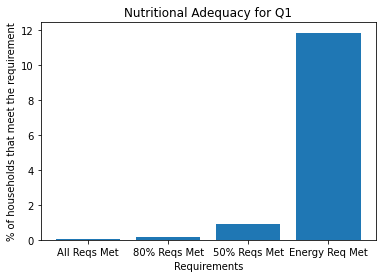

In [247]:
import matplotlib.pyplot as plt
   
Q1_xaxis = perc_df.columns.tolist()
Q1_yaxis = all_percentages_met(Q1_adequacy)

plt.bar(Q1_xaxis, Q1_yaxis)
plt.title('Nutritional Adequacy for Q1')
plt.xlabel('Requirements')
plt.ylabel('% of households that meet the requirement')
plt.show()

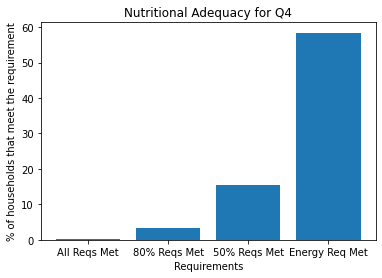

In [248]:
import matplotlib.pyplot as plt
   
Q4_xaxis = perc_df.columns.tolist()
Q4_yaxis = all_percentages_met(Q4_adequacy)

plt.bar(Q4_xaxis, Q4_yaxis)
plt.title('Nutritional Adequacy for Q4')
plt.xlabel('Requirements')
plt.ylabel('% of households that meet the requirement')
plt.show()

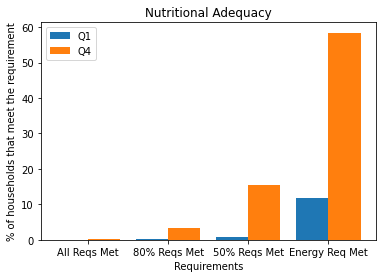

In [249]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = perc_df.columns.tolist()
Ygirls = all_percentages_met(Q1_adequacy)
Zboys = all_percentages_met(Q4_adequacy)
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Q1')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Q4')
  
plt.xticks(X_axis, X)
plt.xlabel("Requirements")
plt.ylabel("% of households that meet the requirement")
plt.title("Nutritional Adequacy")
plt.legend()
plt.show()

### Determine which nutrient requirements are being met by the households in the different quartiles

Define a function to make a dataframe that contains the surplus or deficit of each nutrient consumed on a daily basis by these households with positive numbers being a deficit (that household needs more of that nutrient) and negative numbers being a surplue (that household has more than the necessary amount).

In [250]:
def nutrients_needed(quartile_consumption_df, quartile_HH_char_df):
    first_df = compare_nutrients(quartile_consumption_df, quartile_HH_char_df, quartile_consumption_df.index[0])
    df = pd.DataFrame(first_df['Needed'])
    first_row = list(first_df['Needed'])
    df[str(quartile_consumption_df.index[0])] = first_row
    df = df.drop(columns='Needed').T
    for i in range(1, len(quartile_consumption_df)):
        next_df = compare_nutrients(quartile_consumption_df, quartile_HH_char_df, quartile_consumption_df.index[i])
        next_row = list(next_df['Needed'])
        df.loc[str(quartile_consumption_df.index[i])] = next_row
    return df

Create dataframes for both quartiles holding the surplus and deficit information.

In [251]:
#nutrients_needed_df = nutrients_needed(Q1_consumption_daily, HH_charQ1)
#nutrients_needed_Q4_df = nutrients_needed(Q4_consumption_daily, HH_charQ4)

Convert these dataframes to csv files for easy retieval later.

In [252]:
#nutrients_needed_df.to_csv('nutrients_needed_Q1_df.csv')
#nutrients_needed_Q4_df.to_csv('nutrients_needed_Q4_df.csv')

Read in the csv files and reformat them.

In [253]:
nutrients_needed_Q1 = pd.read_csv('nutrients_needed_Q1_df.csv').reset_index(drop=True)
nutrients_needed_Q1[''] = nutrients_needed_Q1['Unnamed: 0']
nutrients_needed_Q1 = nutrients_needed_Q1.drop(columns=['Unnamed: 0']).set_index('')

nutrients_needed_Q4 = pd.read_csv('nutrients_needed_Q4_df.csv').reset_index(drop=True)
nutrients_needed_Q4[''] = nutrients_needed_Q4['Unnamed: 0']
nutrients_needed_Q4 = nutrients_needed_Q4.drop(columns=['Unnamed: 0']).set_index('')

Create a dataframe that says whether each household received enough of each nutrient. Then sum these to determine how many households received enough of each nutrient. Use that data to also determine what percent of the households in each quartile received enough of each nutrient.

In [254]:
nutrient_surplus_vs_deficitQ1 = nutrients_needed_Q1.apply(lambda x: x < 0)
nutrient_surplus_vs_deficitQ4 = nutrients_needed_Q4.apply(lambda x: x < 0)
summed_nutrientsQ1 = pd.DataFrame(nutrient_surplus_vs_deficitQ1.sum())
summed_nutrientsQ1['Q1 (# HH Met)'] = summed_nutrientsQ1[0]
summed_nutrientsQ1 = summed_nutrientsQ1.drop(columns=0)
summed_nutrientsQ1['Q1 (% Met)'] = summed_nutrientsQ1['Q1 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ1) * 100
summed_nutrientsQ4 = pd.DataFrame(nutrient_surplus_vs_deficitQ4.sum())
summed_nutrientsQ4['Q4 (# HH Met)'] = summed_nutrientsQ4[0]
summed_nutrientsQ4 = summed_nutrientsQ4.drop(columns=0)
summed_nutrientsQ4['Q4 (% Met)'] = summed_nutrientsQ4['Q4 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ4) * 100
all_summed_nutrients = pd.concat([summed_nutrientsQ1, summed_nutrientsQ4], axis=1)
all_summed_nutrients.sort_values(['Q1 (% Met)'], axis=0, ascending=False)

,Q1 (# HH Met),Q1 (% Met),Q4 (# HH Met),Q4 (% Met)
Energy,459,11.848219,2631,58.440693
"Carbohydrate, by difference",142,3.665462,1608,35.717459
Vitamin B-12,129,3.329892,1320,29.320302
Protein,106,2.736190,1341,29.786761
"Magnesium, Mg",92,2.374806,868,19.280320
"Phosphorus, P",90,2.323180,1143,25.388716
Vitamin B-6,76,1.961797,1228,27.276766
"Fiber, total dietary",73,1.884357,839,18.636162
"Iron, Fe",67,1.729479,913,20.279876
Vitamin K (phylloquinone),58,1.497161,472,10.484229


Sort the individual dataframes in descending order to see which of the nutrient minimums are satisfied most often in the upper quartile versus the lower quartile.

In [255]:
sorted_sumsQ1 = summed_nutrientsQ1.sort_values(['Q1 (% Met)'], axis=0, ascending=False)
sorted_sumsQ1

,Q1 (# HH Met),Q1 (% Met)
Energy,459,11.848219
"Carbohydrate, by difference",142,3.665462
Vitamin B-12,129,3.329892
Protein,106,2.736190
"Magnesium, Mg",92,2.374806
"Phosphorus, P",90,2.323180
Vitamin B-6,76,1.961797
"Fiber, total dietary",73,1.884357
"Iron, Fe",67,1.729479
Vitamin K (phylloquinone),58,1.497161


In [256]:
sorted_sumsQ4 = summed_nutrientsQ4.sort_values(['Q4 (% Met)'], axis=0, ascending=False)
sorted_sumsQ4

,Q4 (# HH Met),Q4 (% Met)
Energy,2631,58.440693
"Carbohydrate, by difference",1608,35.717459
Protein,1341,29.786761
Vitamin B-12,1320,29.320302
Vitamin B-6,1228,27.276766
"Phosphorus, P",1143,25.388716
Vitamin E (alpha-tocopherol),1126,25.011106
"Iron, Fe",913,20.279876
"Vitamin C, total ascorbic acid",906,20.124389
"Magnesium, Mg",868,19.280320


# What if we were to double the consumption?

Double the values of consumption per day.

In [269]:
Q1_dbl_consumption_daily = Q1_consumption_daily * 2
Q4_dbl_consumption_daily = Q4_consumption_daily * 2

Rerun the above functions but with the doubled data.

In [270]:
#nutrients_needed_Q1_dbl = nutrients_needed(Q1_dbl_consumption_daily, HH_charQ1)
#nutrients_needed_Q4_dbl = nutrients_needed(Q4_dbl_consumption_daily, HH_charQ4)

In [272]:
#nutrients_needed_Q1_dbl.to_csv('nutrients_needed_Q1_dbl.csv')
#nutrients_needed_Q4_dbl.to_csv('nutrients_needed_Q4_dbl.csv')

In [273]:
nutrients_needed_Q1_dbl = pd.read_csv('nutrients_needed_Q1_dbl.csv').reset_index(drop=True)
nutrients_needed_Q1_dbl[''] = nutrients_needed_Q1_dbl['Unnamed: 0']
nutrients_needed_Q1_dbl = nutrients_needed_Q1_dbl.drop(columns=['Unnamed: 0']).set_index('')

nutrients_needed_Q4_dbl = pd.read_csv('nutrients_needed_Q4_dbl.csv').reset_index(drop=True)
nutrients_needed_Q4_dbl[''] = nutrients_needed_Q4_dbl['Unnamed: 0']
nutrients_needed_Q4_dbl = nutrients_needed_Q4_dbl.drop(columns=['Unnamed: 0']).set_index('')

In [275]:
nutrient_surplus_vs_deficitQ1_dbl = nutrients_needed_Q1_dbl.apply(lambda x: x < 0)
nutrient_surplus_vs_deficitQ4_dbl = nutrients_needed_Q4_dbl.apply(lambda x: x < 0)
summed_nutrientsQ1_dbl = pd.DataFrame(nutrient_surplus_vs_deficitQ1_dbl.sum())
summed_nutrientsQ1_dbl['Q1 (# HH Met)'] = summed_nutrientsQ1_dbl[0]
summed_nutrientsQ1_dbl = summed_nutrientsQ1_dbl.drop(columns=0)
summed_nutrientsQ1_dbl['Q1 (% Met)'] = summed_nutrientsQ1_dbl['Q1 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ1_dbl) * 100
summed_nutrientsQ4_dbl = pd.DataFrame(nutrient_surplus_vs_deficitQ4_dbl.sum())
summed_nutrientsQ4_dbl['Q4 (# HH Met)'] = summed_nutrientsQ4_dbl[0]
summed_nutrientsQ4_dbl = summed_nutrientsQ4_dbl.drop(columns=0)
summed_nutrientsQ4_dbl['Q4 (% Met)'] = summed_nutrientsQ4_dbl['Q4 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ4_dbl) * 100
all_summed_nutrients_dbl = pd.concat([summed_nutrientsQ1_dbl, summed_nutrientsQ4_dbl], axis=1)
all_summed_nutrients_dbl.sort_values(['Q1 (% Met)'], axis=0, ascending=False)



,Q1 (# HH Met),Q1 (% Met),Q4 (# HH Met),Q4 (% Met)
Energy,1255,32.395457,3322,73.789427
"Carbohydrate, by difference",423,10.918947,2132,47.356730
Vitamin E (alpha-tocopherol),369,9.525039,2275,50.533096
Vitamin B-12,350,9.034590,2557,56.796979
Protein,325,8.389262,2246,49.888938
"Phosphorus, P",252,6.504904,1858,41.270546
"Magnesium, Mg",241,6.220960,1473,32.718792
"Fiber, total dietary",206,5.317501,1547,34.362506
Vitamin B-6,198,5.110996,2002,44.469125
Vitamin K (phylloquinone),194,5.007744,1073,23.833852


In [276]:
sorted_sumsQ1_dbl = summed_nutrientsQ1_dbl.sort_values(['Q1 (% Met)'], axis=0, ascending=False)
sorted_sumsQ1_dbl

,Q1 (# HH Met),Q1 (% Met)
Energy,1255,32.395457
"Carbohydrate, by difference",423,10.918947
Vitamin E (alpha-tocopherol),369,9.525039
Vitamin B-12,350,9.034590
Protein,325,8.389262
"Phosphorus, P",252,6.504904
"Magnesium, Mg",241,6.220960
"Fiber, total dietary",206,5.317501
Vitamin B-6,198,5.110996
Vitamin K (phylloquinone),194,5.007744


In [278]:
sorted_sumsQ4_dbl = summed_nutrientsQ4_dbl.sort_values(['Q4 (% Met)'], axis=0, ascending=False)
sorted_sumsQ4_dbl

,Q4 (# HH Met),Q4 (% Met)
Energy,3322,73.789427
Vitamin B-12,2557,56.796979
Vitamin E (alpha-tocopherol),2275,50.533096
Protein,2246,49.888938
"Carbohydrate, by difference",2132,47.356730
Vitamin B-6,2002,44.469125
"Phosphorus, P",1858,41.270546
"Iron, Fe",1632,36.250555
Niacin,1606,35.673034
"Zinc, Zn",1568,34.828965


# ... quadruple the consumption?

Quadruple the daily consumption data, then run the above analysis on the quadrupled data.

In [294]:
Q1_quad_consumption_daily = Q1_consumption_daily * 4
Q4_quad_consumption_daily = Q4_consumption_daily * 4

In [295]:
#nutrients_needed_Q1_quad = nutrients_needed(Q1_quad_consumption_daily, HH_charQ1)
#nutrients_needed_Q4_quad = nutrients_needed(Q4_quad_consumption_daily, HH_charQ4)

In [296]:
#nutrients_needed_Q1_quad.to_csv('nutrients_needed_Q1_quad.csv')
#nutrients_needed_Q4_quad.to_csv('nutrients_needed_Q4_quad.csv')

In [297]:
nutrients_needed_Q1_quad = pd.read_csv('nutrients_needed_Q1_quad.csv').reset_index(drop=True)
nutrients_needed_Q1_quad[''] = nutrients_needed_Q1_quad['Unnamed: 0']
nutrients_needed_Q1_quad = nutrients_needed_Q1_quad.drop(columns=['Unnamed: 0']).set_index('')

nutrients_needed_Q4_quad = pd.read_csv('nutrients_needed_Q4_quad.csv').reset_index(drop=True)
nutrients_needed_Q4_quad[''] = nutrients_needed_Q4_quad['Unnamed: 0']
nutrients_needed_Q4_quad = nutrients_needed_Q4_quad.drop(columns=['Unnamed: 0']).set_index('')

In [298]:
nutrient_surplus_vs_deficitQ1_quad = nutrients_needed_Q1_quad.apply(lambda x: x < 0)
nutrient_surplus_vs_deficitQ4_quad = nutrients_needed_Q4_quad.apply(lambda x: x < 0)
summed_nutrientsQ1_quad = pd.DataFrame(nutrient_surplus_vs_deficitQ1_quad.sum())
summed_nutrientsQ1_quad['Q1 (# HH Met)'] = summed_nutrientsQ1_quad[0]
summed_nutrientsQ1_quad = summed_nutrientsQ1_quad.drop(columns=0)
summed_nutrientsQ1_quad['Q1 (% Met)'] = summed_nutrientsQ1_quad['Q1 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ1_quad) * 100
summed_nutrientsQ4_quad = pd.DataFrame(nutrient_surplus_vs_deficitQ4_quad.sum())
summed_nutrientsQ4_quad['Q4 (# HH Met)'] = summed_nutrientsQ4_quad[0]
summed_nutrientsQ4_quad = summed_nutrientsQ4_quad.drop(columns=0)
summed_nutrientsQ4_quad['Q4 (% Met)'] = summed_nutrientsQ4_quad['Q4 (# HH Met)'] / len(nutrient_surplus_vs_deficitQ4_quad) * 100
all_summed_nutrients_quad = pd.concat([summed_nutrientsQ1_quad, summed_nutrientsQ4_quad], axis=1)
all_summed_nutrients_quad.sort_values(['Q1 (% Met)'], axis=0, ascending=False)



,Q1 (# HH Met),Q1 (% Met),Q4 (# HH Met),Q4 (% Met)
Energy,2308,59.576665,3618,80.364283
Vitamin E (alpha-tocopherol),1378,35.570470,2972,66.015104
Vitamin B-12,887,22.896231,3540,78.631719
"Carbohydrate, by difference",814,21.011874,2506,55.664149
Protein,805,20.779556,3122,69.346957
"Phosphorus, P",578,14.919979,2577,57.241226
"Magnesium, Mg",557,14.377904,2070,45.979565
Vitamin B-6,499,12.880743,2626,58.329631
"Iron, Fe",496,12.803304,2391,53.109729
"Fiber, total dietary",488,12.596799,2082,46.246113


In [299]:
sorted_sumsQ1_quad = summed_nutrientsQ1_quad.sort_values(['Q1 (% Met)'], axis=0, ascending=False)
sorted_sumsQ1_quad

,Q1 (# HH Met),Q1 (% Met)
Energy,2308,59.576665
Vitamin E (alpha-tocopherol),1378,35.570470
Vitamin B-12,887,22.896231
"Carbohydrate, by difference",814,21.011874
Protein,805,20.779556
"Phosphorus, P",578,14.919979
"Magnesium, Mg",557,14.377904
Vitamin B-6,499,12.880743
"Iron, Fe",496,12.803304
"Fiber, total dietary",488,12.596799


In [300]:
sorted_sumsQ4_quad = summed_nutrientsQ4_quad.sort_values(['Q4 (% Met)'], axis=0, ascending=False)
sorted_sumsQ4_quad

,Q4 (# HH Met),Q4 (% Met)
Energy,3618,80.364283
Vitamin B-12,3540,78.631719
Protein,3122,69.346957
Vitamin E (alpha-tocopherol),2972,66.015104
"Zinc, Zn",2688,59.706797
Niacin,2673,59.373612
Vitamin B-6,2626,58.329631
"Phosphorus, P",2577,57.241226
"Carbohydrate, by difference",2506,55.664149
"Iron, Fe",2391,53.109729
